<a href="https://colab.research.google.com/github/Priyanshu27083/CODETECH-Task-2/blob/main/pima_diabetes_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/diabetes.csv")
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Outcome',axis = 1), data['Outcome'], test_size = 0.2, random_state = 0)
for col in data.columns:
    print(col, (data[col]==0).sum())

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [4]:
zero_cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

# Compute medians from training set only
medians = {}
for col in zero_cols:
    medians[col] = X_train[col].median()
    X_train[col] = X_train[col].replace(0, medians[col])
    X_test[col] = X_test[col].replace(0, medians[col])

for col in X_train.columns:
    print(col, (X_train[col]==0).sum())


Pregnancies 95
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0


The objective of logistic regression with L2 regularization is to minimize a penalized loss function, which is the negative log-likelihood of the data plus a penalty term proportional to the sum of the squared coefficients. This combination of objectives helps to prevent overfitting by discouraging overly large coefficients, leading to a simpler, more generalized model that performs better on unseen data.

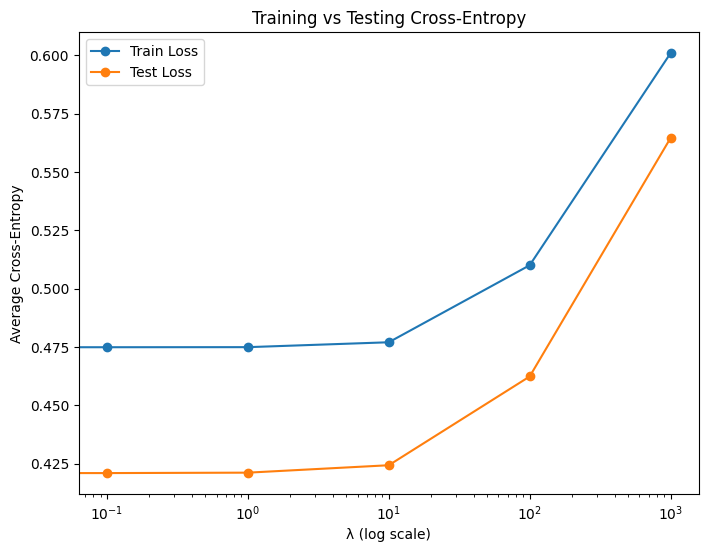

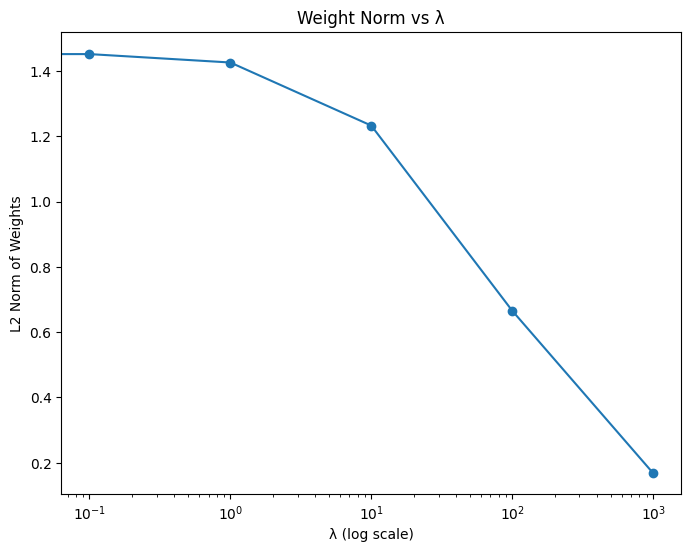

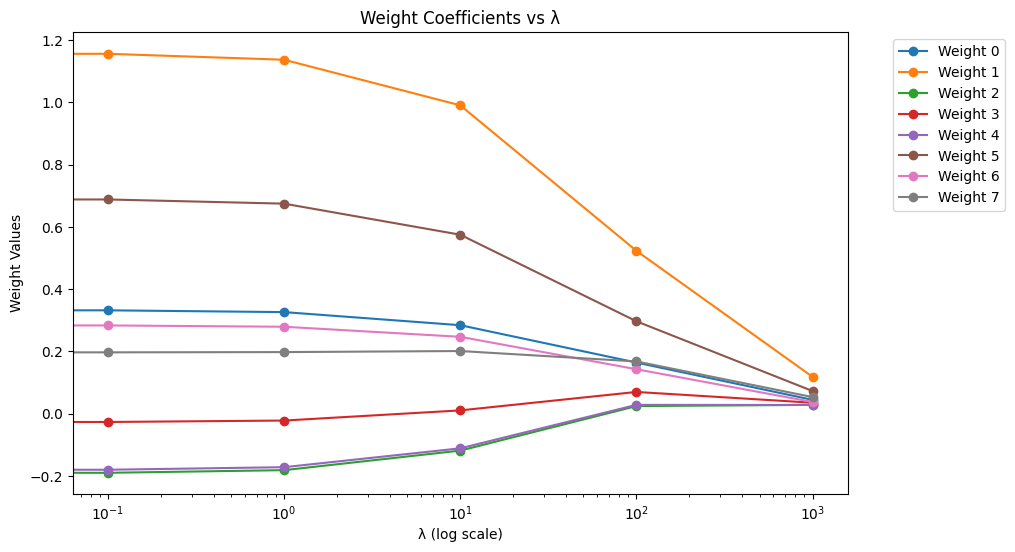

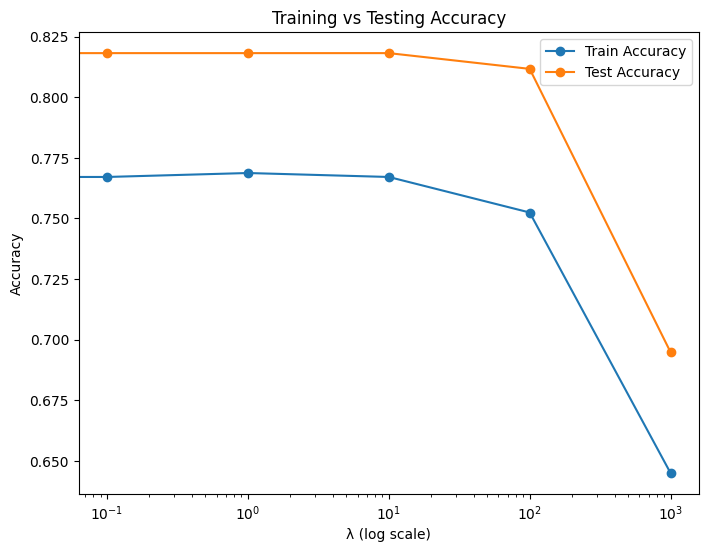

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score

# Different values of regularization (λ)
lambdas = [0, 0.1, 1, 10, 100, 1000]

# Empty lists to save results
train_losses, test_losses = [], []
train_accs, test_accs = [], []
weights, weight_norms = [], []

# Scale the data so all features are on similar size
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and test for each λ
for lam in lambdas:
    if lam == 0:
        model = LogisticRegression(penalty=None, solver="lbfgs", max_iter=1000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=1000)

    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict_proba(X_train_scaled)[:, 1]
    y_test_pred = model.predict_proba(X_test_scaled)[:, 1]

    # Cross-entropy loss
    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))

    # Accuracy
    train_accs.append(accuracy_score(y_train, (y_train_pred > 0.5).astype(int)))
    test_accs.append(accuracy_score(y_test, (y_test_pred > 0.5).astype(int)))

    # Weights and L2 norm
    w = model.coef_.flatten()
    weights.append(w)
    weight_norms.append(np.linalg.norm(w, 2))

# Convert list to numpy array for plotting
weights = np.array(weights)

# Plot 1: Cross-Entropy (Train vs Test)
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_losses, marker='o', label="Train Loss")
plt.plot(lambdas, test_losses, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Average Cross-Entropy")
plt.title("Training vs Testing Cross-Entropy")
plt.legend()
plt.show()

# Plot 2: L2 Norm of Weights
plt.figure(figsize=(8,6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("Weight Norm vs λ")
plt.show()

# Plot 3: Weight Values
plt.figure(figsize=(10,6))
for j in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, j], marker='o', label=f'Weight {j}')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Values")
plt.title("Weight Coefficients vs λ")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 4: Accuracy (Train vs Test)
plt.figure(figsize=(8,6))
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.legend()
plt.show()
